In [3]:
# import packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.patches import Ellipse
%matplotlib inline
import pandas as pd
from pandas import DataFrame, Series
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LogNorm
from collections import Counter
import ROOT
import root_numpy
import math
import scipy.integrate



Welcome to JupyROOT 6.14/04


In [4]:

def get_raw(filename):
    f = ROOT.TFile(filename)
    tree = f.Get('events/events')
    out=root_numpy.tree2array(tree)
    x=np.array([out['xp'][i] for i in range(len(out['xp']))])
    y=np.array([out['yp'][i] for i in range(len(out['yp']))])
    z=np.array([out['zp'][i] for i in range(len(out['zp']))])
    ed=np.array([out['ed'][i] for i in range(len(out['ed']))])
    x_pri=([out['xp_pri']])
    y_pri=([out['yp_pri']])
    z_pri=([out['zp_pri']])
    return x, y, z, ed, x_pri, y_pri, z_pri


In [5]:

def get_proc(filename):
    f = ROOT.TFile(filename)
    tree = f.Get('events')
    out=root_numpy.tree2array(tree)
    x=np.array([out['Xp'][i] for i in range(len(out['Xp']))])
    y=np.array([out['Yp'][i] for i in range(len(out['Yp']))])
    z=np.array([out['Zp'][i] for i in range(len(out['Zp']))])
    ed=np.array([out['Etot'][i] for i in range(len(out['Etot']))])
    x_rms=np.array([out['Xp_RMS'][i] for i in range(len(out['Xp_RMS']))])
    y_rms=np.array([out['Yp_RMS'][i] for i in range(len(out['Yp_RMS']))])
    z_rms=np.array([out['Zp_RMS'][i] for i in range(len(out['Zp_RMS']))])
    x_pri=([out['xpri']])
    y_pri=([out['ypri']])
    z_pri=([out['zpri']])
    n_scat=([out['nScat']])
    return x, y, z, ed, x_rms, y_rms, z_rms, x_pri, y_pri, z_pri, n_scat


In [16]:

#filename_core = 'Topology_0vbb_2x1229keV_100_HighRes'
filename_core = 'Topology_electron_2458keV_100_HighRes'
#filename_core = 'Topology_gamma_2458keV_100_HighRes'
#filename_core = 'Topology_0v2EC_100'

filename_raw = filename_core + '.root'
print(filename_raw)
filename_proc = filename_core + '_Proc.root'
print(filename_proc)


Topology_electron_2458keV_100_HighRes.root
Topology_electron_2458keV_100_HighRes_Proc.root


In [17]:
cd /userdata/fkuger/0vbb_data/0vbb_Topology

/userdata/fkuger/0vbb_data/0vbb_Topology


In [18]:
x,y,z,ed, x_start, y_start, z_start = get_raw(filename_raw)
x_start = np.asarray(x_start)
y_start = np.asarray(y_start)
z_start = np.asarray(z_start)

X_cl, Y_cl, Z_cl, Etot_cl, X_rms, Y_rms, Z_rms, X_pri_, Y_pri, Z_pri, N_scat = get_proc(filename_proc)


### Plot  Topology - Displays for selected events
- Define event number range prior to execution


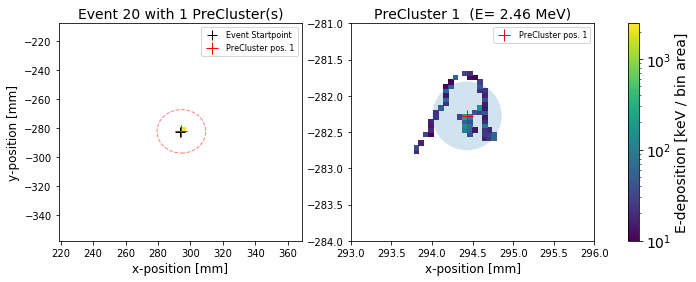

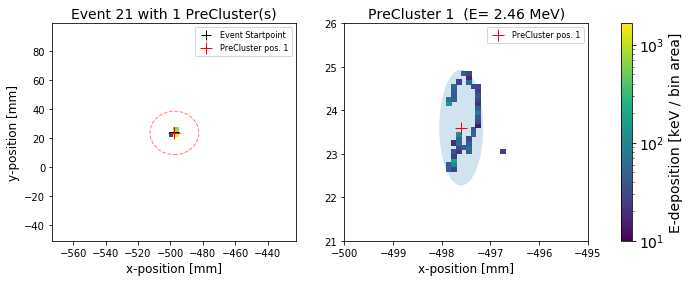

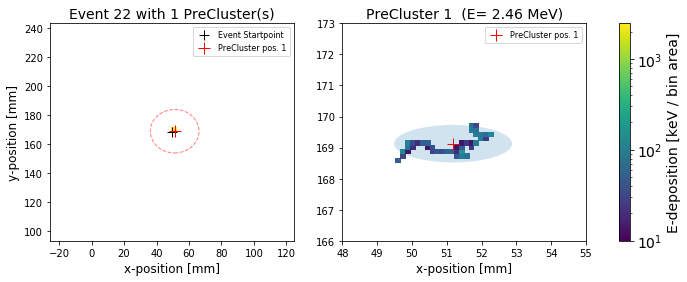

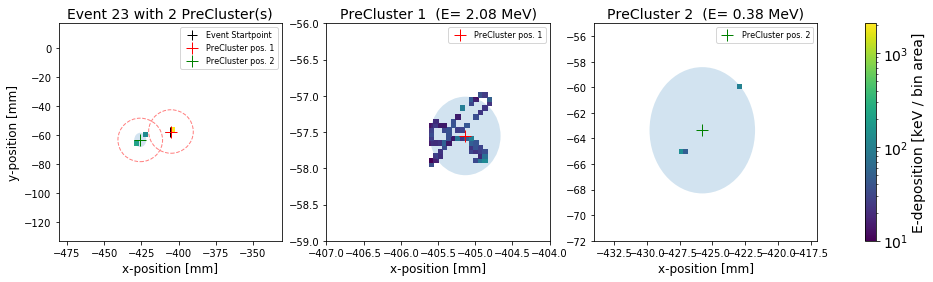

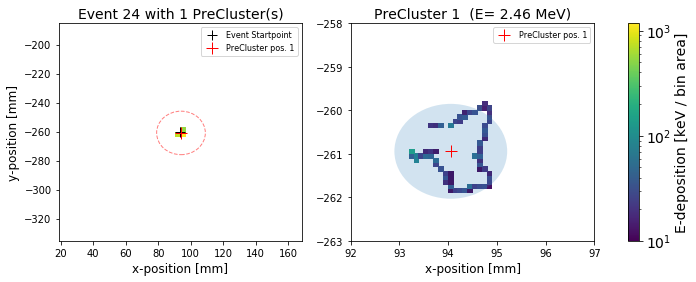

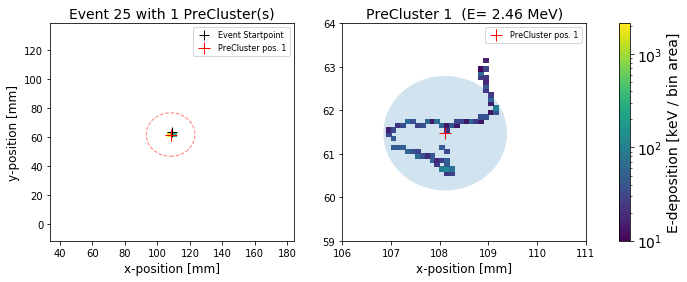

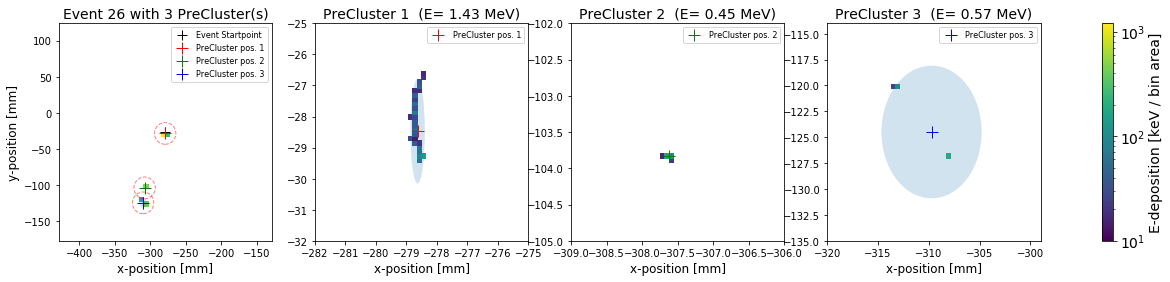

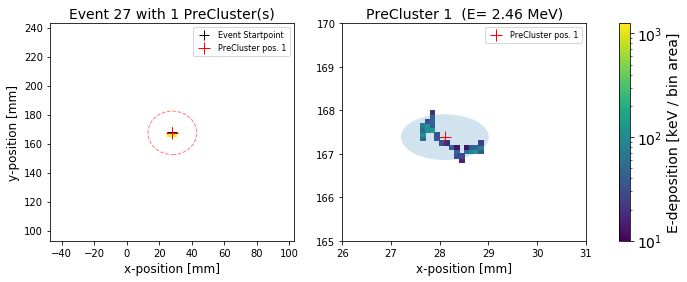

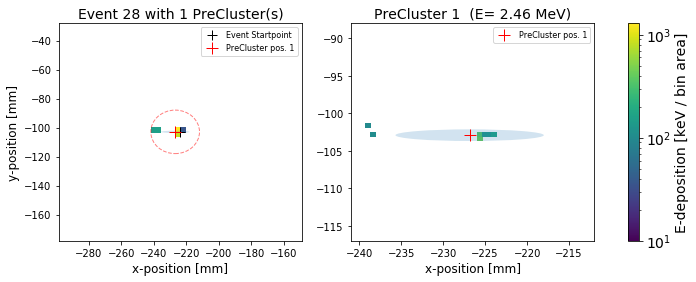

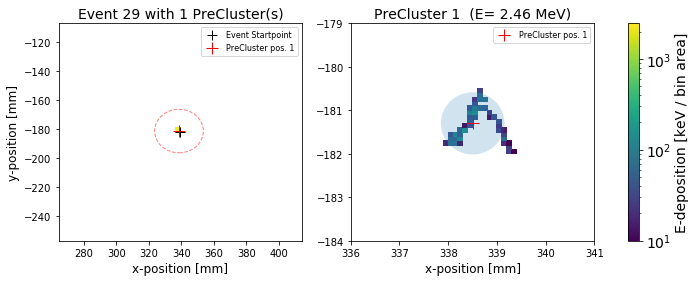

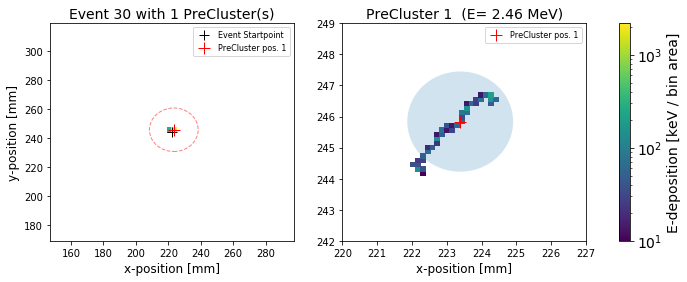

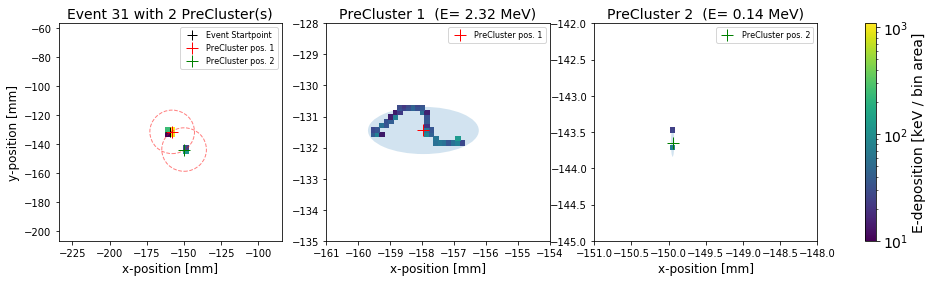

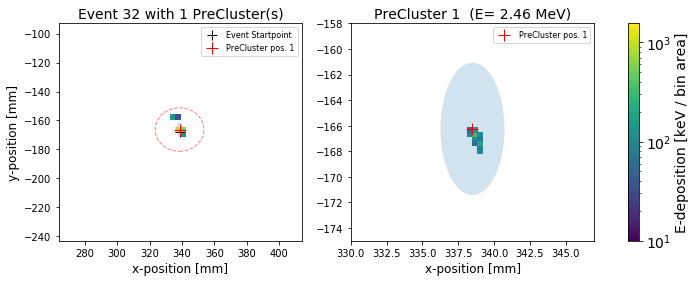

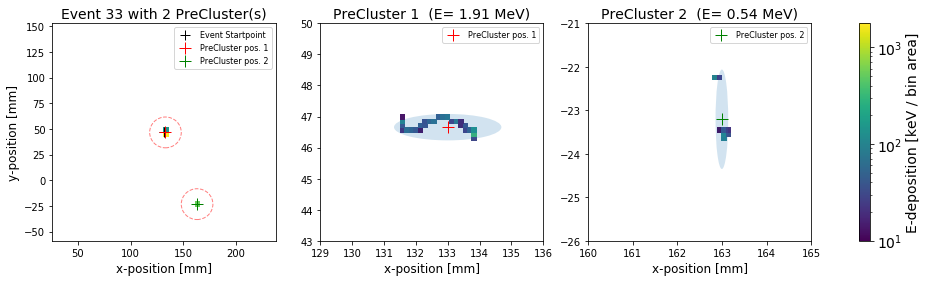

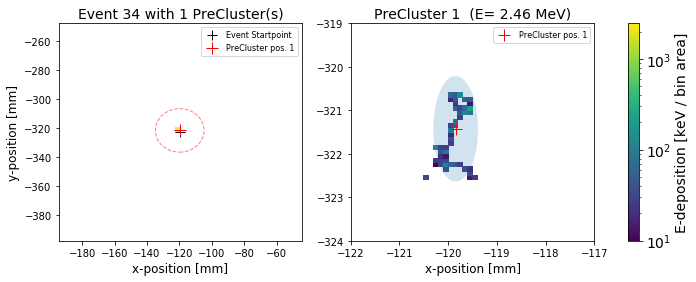

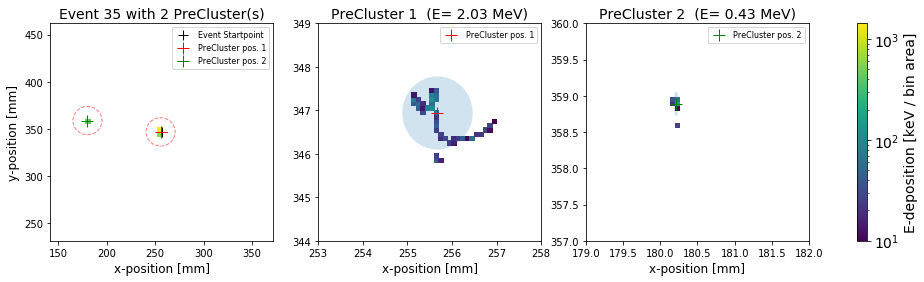

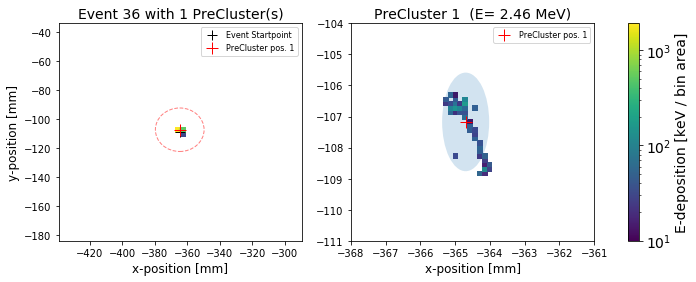

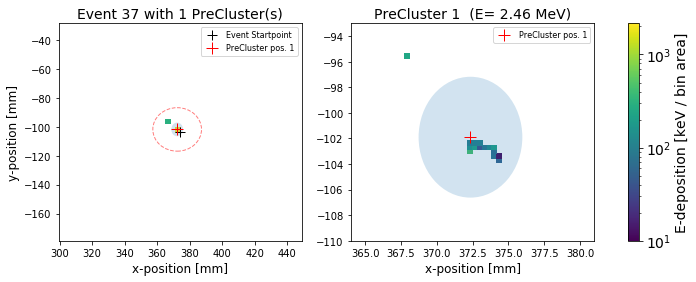

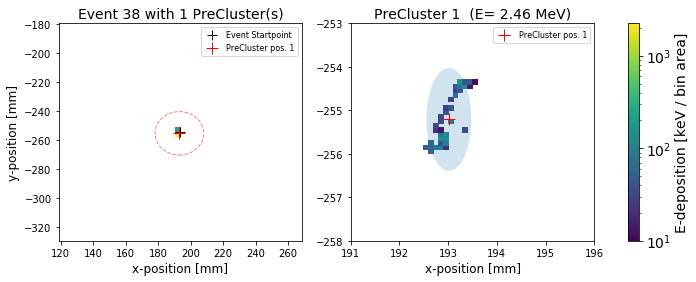

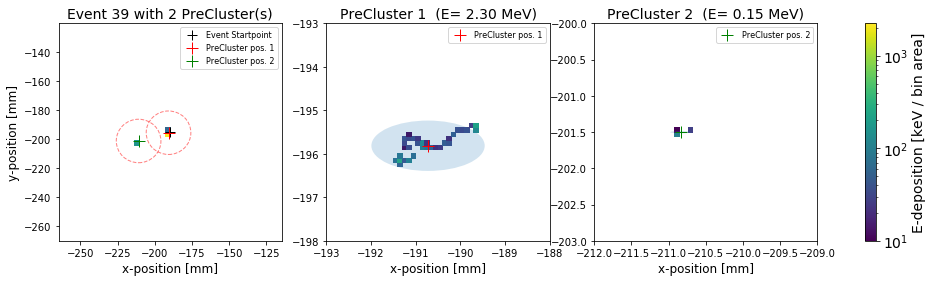

In [19]:

for i in range(20,40):
    
    nrows, ncols = 1, len(X_cl[i])+1
        
    fig, axes = plt.subplots(figsize = (5*ncols+2,4), nrows=nrows, ncols=ncols)
    
    max_extend = 1.5* np.amax((np.abs(np.amax(x[i])-x_start[0,i]), 
                               np.abs(np.amin(x[i])-x_start[0,i]), 
                               np.abs(np.amax(y[i])-y_start[0,i]), 
                               np.abs(np.amin(y[i])-y_start[0,i]), 50))
    
    counts, xedges, yedges, im = axes[0].hist2d(x[i] , y[i], weights=ed[i], cmin=1, range=[[x_start[0,i]-max_extend,x_start[0,i]+max_extend],[y_start[0,i]-max_extend,y_start[0,i]+max_extend]], bins = 50, norm=LogNorm(vmin=10))
    axes[0].plot(x_start[0,i], y_start[0,i], '+', color='black', markersize=10, label='Event Startpoint')
    axes[0].set_xlabel('x-position [mm]', fontsize=12)
    axes[0].set_ylabel('y-position [mm]', fontsize=12)
    axes[0].set_title('Event %i with %i PreCluster(s)'  %(i, len(X_cl[i])), fontsize=14)
   
    
    cbar = plt.colorbar(im, ax=axes)
    cbar.ax.tick_params(labelsize=14) 
    cbar.set_label( label='E-deposition [keV / bin area]', size=14) 
    
    markercolors = ["red", "green", "blue", "purple", 'gold', 'c', 'm', 'b', 'sienna', 'indigo', ]
    
    
    for j in range(0, len(X_cl[i])):
        ellipse = Ellipse((X_cl[i][j], Y_cl[i][j]), 4*X_rms[i][j], 4*Y_rms[i][j], angle=0, alpha=0.2, label = '2_sigma PreCluster Ellipse')
        axes[0].add_artist(ellipse)
        axes[0].plot(X_cl[i][j], Y_cl[i][j], '+',color=markercolors[j],  markersize=12, label='PreCluster pos. %i' %(j+1))
        
        circle=plt.Circle((X_cl[i][j],Y_cl[i][j]),15.0,color='r', fill=False, linestyle='--', alpha = 0.5)
        axes[0].add_artist(circle)
        
        
        max_extend_2 = np.ceil(3*np.maximum(X_rms[i][j], Y_rms[i][j])) #in mm 
        counts, xedges, yedges, im = axes[j+1].hist2d(x[i] , y[i], weights=ed[i], cmin=1, range=[[np.floor(X_cl[i][j]-max_extend_2),np.ceil(X_cl[i][j]+max_extend_2)],[np.floor(Y_cl[i][j]-max_extend_2),np.ceil(Y_cl[i][j]+max_extend_2)]], bins = 50, norm=LogNorm(vmin=10, vmax=3000))
        
        ellipse2 = Ellipse((X_cl[i][j], Y_cl[i][j]), 4*X_rms[i][j], 4*Y_rms[i][j], angle=0, alpha=0.2, label = '2_sigma PreCluster Ellipse')
        axes[j+1].add_artist(ellipse2)
        axes[j+1].plot(X_cl[i][j], Y_cl[i][j], '+', color=markercolors[j], markersize=12, label='PreCluster pos. %i' %(j+1))
        axes[j+1].set_xlabel('x-position [mm]', fontsize=12)
        axes[j+1].legend(fontsize=8)
        axes[j+1].set_title('PreCluster %i  (E= %3.2f MeV)' %(j+1, Etot_cl[i][j]/1000), fontsize=14)
    
    axes[0].legend(fontsize=8)

    plt.show()


### Topology_Display for 0vbb-paper Plot


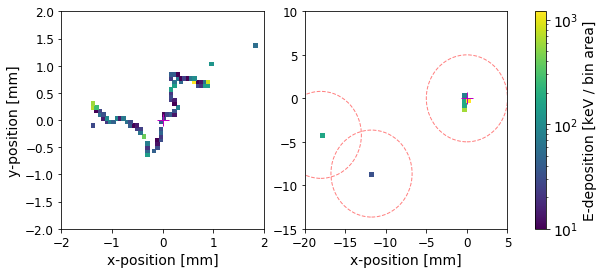

In [45]:
filename = 'test_6.root'

x,y,z,ed, x_start, y_start, z_start = get_raw(filename)
x_start = np.asarray(x_start)
y_start = np.asarray(y_start)
z_start = np.asarray(z_start)
    
fig, axes = plt.subplots(figsize = (10,4), nrows=1, ncols=2)

i=56
counts, xedges, yedges, im = axes[0].hist2d(x[i]-x_start[0,i] , y[i]-y_start[0,i], weights=ed[i], cmin=1, range=[[-2,2],[-2,2]], bins = 60, norm=LogNorm(vmin=10))
axes[0].plot(0, 0, 'm+', markersize=12)


i=46
counts, xedges, yedges, im = axes[1].hist2d(x[i]-x_start[0,i] , y[i]-y_start[0,i], weights=ed[i], cmin=1, range=[[-20,5],[-15,10]], bins = 50, norm=LogNorm(vmin=10))
axes[1].plot(0, 0, 'm+', markersize=12)    
    
circle1=plt.Circle((0,0),5.0,color='r', fill=False, linestyle='--', alpha = 0.5)
circle2=plt.Circle((-18,-4.2),5.0,color='r', fill=False, linestyle='--', alpha = 0.5)
circle3=plt.Circle((-11.75,-8.65),5.0,color='r', fill=False, linestyle='--', alpha = 0.5)
plt.gcf().gca().add_artist(circle1)
plt.gcf().gca().add_artist(circle2)
plt.gcf().gca().add_artist(circle3)
    
    
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[1].tick_params(axis='both', which='major', labelsize=12)
    
axes[0].set_xlabel('x-position [mm]', fontsize=14)
axes[1].set_xlabel('x-position [mm]', fontsize=14)
axes[0].set_ylabel('y-position [mm]', fontsize=14)
    
cbar = plt.colorbar(im, ax=axes)
cbar.ax.tick_params(labelsize=14) 
cbar.set_label( label='E-deposition [keV / bin area]', size=14) 

plt.show()